In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [2]:
churn_df = pd.read_csv('churn.csv')
churn_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,0
4,36,75,415,155,1,0,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,0


In [7]:
churn_df['class'].unique()

array([0, 1], dtype=int64)

### Show all column name and its datatype

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null int64
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null int64
international_plan               5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               

### Check if there is any null values -> No null values

In [9]:
churn_df.isna().any()

state                            False
account_length                   False
area_code                        False
phone_number                     False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
class                            False
dtype: bool

### Check if there is any duplicate rows -? No duplicate rows

In [13]:
churn_df[churn_df.duplicated()]

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class


### Show the statistics of each columns

In [8]:
churn_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,26.00,100.26,436.91,2499.50,0.09,0.26,7.76,180.29,100.03,30.65,200.64,100.19,17.05,200.39,99.92,9.02,10.26,4.44,2.77,1.57,0.14
std,14.80,39.69,42.21,1443.52,0.29,0.44,13.55,53.89,19.83,9.16,50.55,19.83,4.30,50.53,19.96,2.27,2.76,2.46,0.75,1.31,0.35
min,0.00,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.00,73.00,408.00,1249.75,0.00,0.00,0.00,143.70,87.00,24.43,166.38,87.00,14.14,166.90,87.00,7.51,8.50,3.00,2.30,1.00,0.00
50%,26.00,100.00,415.00,2499.50,0.00,0.00,0.00,180.10,100.00,30.62,201.00,100.00,17.09,200.40,100.00,9.02,10.30,4.00,2.78,1.00,0.00
75%,39.00,127.00,415.00,3749.25,0.00,1.00,17.00,216.20,113.00,36.75,234.10,114.00,19.90,234.70,113.00,10.56,12.00,6.00,3.24,2.00,0.00
max,50.00,243.00,510.00,4999.00,1.00,1.00,52.00,351.50,165.00,59.76,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


### 1. Show how many customers that churn -> There are 707 subcribers that churn out of 5000 subcriber samples

In [28]:
summary_df = pd.DataFrame(churn_df['class'].replace([0, 1], ['Stay', 'Churned']).value_counts())
summary_df = summary_df.T
summary_df

,Stay,Churned
class,4293,707


### 2. Calculate churn rate -> The churn rate of the sample is 14%

In [29]:
summary_df['Churn Rate'] = summary_df['Churned']/(summary_df['Stay']+summary_df['Churned'])
summary_df

,Stay,Churned,Churn Rate
class,4293,707,0.14


### 3. Show the correlation coefficient of class -> International plan, Num of Customer Service Calls, Total Day Minutes and Total Day Charge have slightly strong relationship with Churn status

In [30]:
churn_df.corr('pearson')['class'].sort_values(ascending=False)

class                            1.00
international_plan               0.26
number_customer_service_calls    0.21
total_day_minutes                0.21
total_day_charge                 0.21
total_eve_minutes                0.09
total_eve_charge                 0.09
total_intl_minutes               0.06
total_intl_charge                0.06
total_night_minutes              0.05
total_night_charge               0.05
account_length                   0.02
total_day_calls                  0.02
phone_number                     0.01
area_code                        0.01
state                            0.01
total_eve_calls                 -0.01
total_night_calls               -0.01
total_intl_calls                -0.05
number_vmail_messages           -0.10
voice_mail_plan                 -0.11
Name: class, dtype: float64

### 4. Average number of customer service calls between staying and churned customers

In [44]:
avg_customer_call = churn_df.groupby(by=['class'])['number_customer_service_calls'].mean()
avg_customer_call

class
0   1.46
1   2.25
Name: number_customer_service_calls, dtype: float64

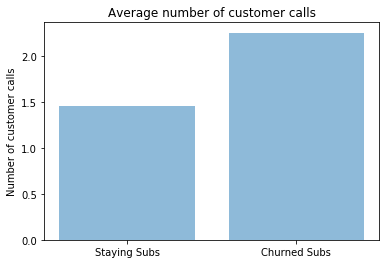

In [50]:
objects = ('Staying Subs', 'Churned Subs')
y_pos = np.arange(len(objects))
customer_calls = avg_customer_call.T.values

plt.bar(y_pos, customer_calls, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of customer calls')
plt.title('Average number of customer calls')

plt.show()

### 5. Average total day minutes between staying and churned customers

In [54]:
avg_total_day_minutes = churn_df.groupby(by=['class'])['total_day_minutes'].mean()
avg_total_day_minutes

class
0   175.75
1   207.87
Name: total_day_minutes, dtype: float64

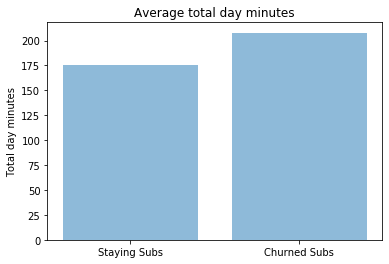

In [56]:
objects = ('Staying Subs', 'Churned Subs')
y_pos = np.arange(len(objects))
total_day_minutes = avg_total_day_minutes.T.values

plt.bar(y_pos, total_day_minutes, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total day minutes')
plt.title('Average total day minutes')

plt.show()